In [154]:
import pandas as pd
import numpy as np

In [155]:
df= pd.read_csv("/Users/intesurahmed/Documents/Topic modeling diff domain/research articles/test.csv", header=0)


# Drop first column of dataframe using pop()
# df.pop(df.columns[0])

df = df.sample(frac=1, random_state=1).reset_index(drop=True)
print(df)



         ID                                              TITLE  \
0     27309  Special zeta values using tensor powers of Dri...   
1     29201  Absence of the Pauli-Paramagnetic Limit in a S...   
2     26461                   Super learning in the SAS system   
3     24032  General rogue waves in the nonlocal PT-symmetr...   
4     27679  Investigating the Role of Socially Mediated Me...   
...     ...                                                ...   
8984  23868  Competing spin liquids and hidden nematic orde...   
8985  28786  Optimal stability for a first order coefficien...   
8986  21878  Feedback Techniques in Computer-Based Simulati...   
8987  26165  A characterization of the Macaulay dual genera...   
8988  21208  Two-stage multipolar ordering in Pr(TM)$_2$Al$...   

                                               ABSTRACT  
0       We study tensor powers of rank 1 sign-normal...  
1       We performed $^{59}$Co nuclear magnetic reso...  
2       Background and objective:

In [156]:
article=df.ABSTRACT.values[:1000]

In [157]:
len(article)

1000

In [158]:
print(article)

['  We study tensor powers of rank 1 sign-normalized Drinfeld A-modules, where A\nis the coordinate ring of an elliptic curve over a finite field. Using the\ntheory of vector valued Anderson generating functions, we give formulas for the\ncoefficients of the logarithm and exponential functions associated to these\nA-modules. We then show that there exists a vector whose bottom coordinate\ncontains a Goss zeta value, whose evaluation under the exponential function is\ndefined over the Hilbert class field. This allows us to prove the transcendence\nof Goss zeta values and periods of Drinfeld modules as well as the\ntranscendence of certain ratios of those quantities.\n'
 '  We performed $^{59}$Co nuclear magnetic resonance (NMR) measurements of\nsingle-crystalline U$_6$Co. There is a small decrease in the Knight shift in\nthe superconducting (SC) state, but this change mainly arises from the SC\ndiamagnetic effect. The negligible change of the spin part of the Knight shift,\ntogether wit

In [159]:
main_data= article

In [160]:
import collections

Community Detection

In [161]:
art = []
for i in article:
    if(len(str(i))>0):
        art.append(str(i))
article = art
len(article)

1000

In [162]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

import re
from gensim.parsing.preprocessing import remove_stopwords

from nltk.corpus import wordnet

In [163]:
pos = ["FW", "NN", "NNS", "NNP", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

In [164]:
wn = nltk.WordNetLemmatizer()

In [165]:
def unique(s):
    unique_list = []
    for x in s:
        if x not in unique_list:
            check = x.isnumeric()
            if(check):
                unique_list.append("num")
            else:
                unique_list.append(x)
            
    return unique_list

In [166]:
def preprocess(art):
    articles = []
    for l in art:
        l = str(l)
        if(len(l)>300):
            txt = l
            tokenized = sent_tokenize(txt)
            t = []
            for i in tokenized:
                wordsList = nltk.word_tokenize(i)
                wordsList = [w for w in wordsList if not w in stop_words]
                tagged = nltk.pos_tag(wordsList)
                for i in tagged:
                    t.append(i)
            s = ""
            for i in t:
                if(i[1] in pos):
                    s=s+" "+i[0]
            article = s
            article = article.lower()
            article = re.sub(r'[^\w\s]','',article)
            article = remove_stopwords(article)
            words_article = word_tokenize(article)
            wa = []
            for i in words_article:
                a = wn.lemmatize(i)
                wa.append(a)
            
            s = unique(wa)
            articles.append(s)
            
            
    return articles

In [167]:
topic_sen = preprocess(article)

In [169]:
article

['  We study tensor powers of rank 1 sign-normalized Drinfeld A-modules, where A\nis the coordinate ring of an elliptic curve over a finite field. Using the\ntheory of vector valued Anderson generating functions, we give formulas for the\ncoefficients of the logarithm and exponential functions associated to these\nA-modules. We then show that there exists a vector whose bottom coordinate\ncontains a Goss zeta value, whose evaluation under the exponential function is\ndefined over the Hilbert class field. This allows us to prove the transcendence\nof Goss zeta values and periods of Drinfeld modules as well as the\ntranscendence of certain ratios of those quantities.\n',
 '  We performed $^{59}$Co nuclear magnetic resonance (NMR) measurements of\nsingle-crystalline U$_6$Co. There is a small decrease in the Knight shift in\nthe superconducting (SC) state, but this change mainly arises from the SC\ndiamagnetic effect. The negligible change of the spin part of the Knight shift,\ntogether wi

In [170]:
counts = {}
for i in topic_sen:
    for j in i:
        if j in counts:
            counts[j] +=1
        else:
            counts[j] = 1

In [171]:
new_data = []
for i in topic_sen:
    art=[]
    for j in i:
        if(counts[j]>1):
            art.append(j)
    new_data.append(art)

In [172]:
c = 0
for i in new_data:
    c = c + len(i)
c

38703

In [173]:
replace = {}
w = []
for i in new_data:
    for word in i:
        synonyms = []
        for syn in wordnet.synsets(word):
            for i in syn.lemmas():
                synonyms.append(i.name())
        if(len(set(synonyms))==0):
            replace[word] = word
            w.append(word)
        else:
            for i in synonyms:
                if i not in w:
                    replace[i] = word
                    w.append(word)

In [174]:
final_topic_sen = []
for i in new_data:
    a = []
    for j in i:
        if(j in replace):
            a.append(replace[j])
        else:
            a.append(j)
    final_topic_sen.append(a)

In [175]:
c = 0
for i in final_topic_sen:
    c = c + len(i)
    
c

38703

In [176]:
import math
from sklearn.feature_extraction.text import TfidfVectorizer

In [177]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=2)

In [178]:
documents = []
for i in final_topic_sen:
    s = ""
    for j in i:
        s = s+" "+j
    documents.append(s)

In [179]:
len(documents)

964

In [180]:
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [181]:
len(tfidf_vectorizer.get_feature_names())

/Users/intesurahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3394

In [182]:
valid = tfidf_vectorizer.get_feature_names()

In [183]:
final = []
for i in final_topic_sen:
    s = []
    for j in i:
        if j in valid:
            s.append(j)
    if(len(s)>0):
        final.append(s)

In [184]:
len(final)

964

In [185]:
dt = []
for i in final:
    s = ""
    for j in i:
        s = s+j+" "
    dt.append(s)

In [186]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')

X = cv.fit_transform(dt)
Xc = (X.T * X)
Xc.setdiag(0)

In [187]:
names = cv.get_feature_names()
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

In [188]:
import numpy as np

In [189]:
matrix = df.where(np.triu(np.ones(df.shape)).astype(np.bool))
matrix

/var/folders/6f/f1d7t8ds66q5225tvtl8vhd00000gn/T/ipykernel_820/1718618950.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = df.where(np.triu(np.ones(df.shape)).astype(np.bool))


,_2,_6,_odot,_x,a3c,ab,abc,ability,absence,absolute,...,yield,yielded,yielding,young,yz,z3,zero,zeta,zigzag,zone
_2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
_6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
_odot,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
_x,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
a3c,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0
zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0
zeta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
zigzag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [190]:
matrix = matrix.stack().reset_index()
matrix.columns = ['Row','Column','Value']
matrix

,Row,Column,Value
0,_2,_2,0.0
1,_2,_6,0.0
2,_2,_odot,0.0
3,_2,_x,1.0
4,_2,a3c,0.0
...,...,...,...
5703748,zeta,zigzag,0.0
5703749,zeta,zone,0.0
5703750,zigzag,zigzag,0.0
5703751,zigzag,zone,0.0


In [191]:
edge = matrix[matrix["Value"] != 0]
edge

,Row,Column,Value
3,_2,_x,1.0
26,_2,accretion,1.0
30,_2,achieve,1.0
39,_2,action,1.0
76,_2,advice,1.0
...,...,...,...
5703586,x1,xrays,1.0
5703634,xray,xrays,1.0
5703688,year,yield,2.0
5703689,year,yielded,1.0


In [192]:
node1 = edge.Row.values
node2 = edge.Column.values
value = edge.Value.values

In [193]:
value = 1/value

In [194]:
import networkx as nx
import matplotlib.pyplot as plt
# from networkx.algorithms.community import k_clique_communities
# from networkx.algorithms import community
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm

In [195]:
G = nx.Graph()

In [196]:
for i in range(0, len(node1)):
    G.add_edge(node1[i], node2[i])

In [197]:
# !pip install louvain

In [198]:
# !pip uninstall community -y

In [199]:
!pip install python-louvain

In [200]:
partition = community_louvain.best_partition(G)

In [201]:
m = max(list(partition.values()))
total_com = m+1
total_com

6

In [202]:
community_word = []
for i in range(0, total_com):
    a=[]
    for j in partition:
        if partition[j] == i:
            a.append(j)
            
            
    print(i,"------->")
    print("Total Words: ", len(a))
    print("Words: ", a)
    print()
    print()
    print()
    community_word.append(a)

0 ------->
Total Words:  1205
Words:  ['achieve', 'action', 'agrees', 'area', 'based', 'camera', 'control', 'data', 'evaluate', 'guidance', 'insight', 'introduce', 'paper', 'protocol', 'provides', 'proving', 'reduce', 'representation', 'rule', 'sensing', 'technique', 'use', 'versus', 'work', 'generation', 'understood', 'account', 'compared', 'majority', 'undergoing', 'address', 'analysis', 'analyzed', 'approach', 'attributed', 'box', 'challenging', 'driving', 'experiment', 'feature', 'finding', 'introducing', 'performance', 'validated', 'a3c', 'ability', 'advantage', 'agent', 'applicability', 'aspect', 'atari', 'attention', 'called', 'card', 'challenge', 'cnn', 'code', 'deal', 'engaged', 'game', 'handcrafted', 'highlight', 'human', 'incorporate', 'job', 'learn', 'learning', 'learns', 'led', 'method', 'network', 'online', 'operation', 'option', 'propose', 'qlearning', 'reaching', 'relationship', 'reward', 'skill', 'suite', 'tackle', 'train', 'trained', 'computation', 'improving', 'infor

In [203]:
for i in range(0, len(community_word)):
    importent = {}
    j_count = []
    com = community_word[i]
    G6 = nx.Graph()
    for e in range(0, len(node1)):
        if(node1[e] in com  and node2[e] in com):
            G6.add_edge(node1[e], node2[e], weight=value[e])
            
    centrality = nx.eigenvector_centrality(G6)      
    a = sorted(centrality.items())
    eg = {}
    for j in a:
        eg[j[0]] = j[1]
    sorted_dict = {k: v for k, v in sorted(eg.items(), key=lambda item: item[1],reverse=True)}
    print(i,"------------>")
    print(sorted_dict)
    print()
    print()

0 ------------>
{'model': 0.10532511311634746, 'paper': 0.10196576825174695, 'approach': 0.10092456818815873, 'data': 0.10008122663118807, 'proposed': 0.09796911972083842, 'method': 0.09667825767662173, 'work': 0.09665158917146084, 'based': 0.09561996602195139, 'network': 0.09356312328331788, 'learning': 0.09288463557433223, 'performance': 0.09202976081897457, 'provides': 0.09163945533520197, 'analysis': 0.0897516508253345, 'information': 0.08853455848085122, 'algorithm': 0.0878466841940894, 'job': 0.0848450227804734, 'application': 0.08371089742597773, 'use': 0.0831204245432088, 'experiment': 0.08269171718037364, 'feature': 0.08092084131909891, 'training': 0.07953181726439464, 'propose': 0.07871743798293594, 'way': 0.07810016690144876, 'technique': 0.07789011238012905, 'process': 0.07714830566866454, 'existing': 0.0766670658933, 'datasets': 0.07658127799100903, 'machine': 0.07480637377223996, 'input': 0.07390381705931678, 'accuracy': 0.07223809361639963, 'prediction': 0.07222312434853

1 ------------>
{'set': 0.1261188714351734, 'rate': 0.12135560319508157, 'time': 0.12115616676351322, 'observation': 0.11601550611210798, 'present': 0.11373045113258956, 'simulation': 0.11141117000655815, 'distribution': 0.11042239555965667, 'discovered': 0.10517700165067108, 'mass': 0.10346054538727115, 'evolution': 0.09902443748526074, 'num': 0.09892135953998174, 'reference': 0.09852126513844482, 'star': 0.09850601065173431, 'density': 0.09653947645060265, 'mechanism': 0.09618940804961995, 'environment': 0.09464342883409899, 'scale': 0.09378514941107702, 'estimate': 0.09373937329216445, 'measurement': 0.09136725979315315, 'region': 0.0874440297026847, 'survey': 0.08734039450073476, 'galaxy': 0.08723975813662393, 'measure': 0.08682127725499553, 'including': 0.0865862108657769, 'lead': 0.08556067631086912, 'emission': 0.08532203974012713, 'year': 0.08439663162926474, 'component': 0.08427721417586606, 'sample': 0.08404924709701342, 'formation': 0.08338682585312754, 'identify': 0.0828706

3 ------------>
{'consequence': 0.1346594154098533, 'study': 0.1328409795093879, 'state': 0.12475156718076676, 'field': 0.1221139599460664, 'interaction': 0.1181253797293613, 'effect': 0.11795084942496425, 'order': 0.1149973075131323, 'property': 0.11234552246693545, 'phase': 0.110621323560561, 'energy': 0.1100454165031105, 'change': 0.10567578512848365, 'structure': 0.10388342764420956, 'theory': 0.10235895687433762, 'temperature': 0.09871914330016297, 'dynamic': 0.09834278273263554, 'transition': 0.09799224470478177, 'degree': 0.09443861361742106, 'spin': 0.09256732500858725, 'quantum': 0.09223323190297006, 'factor': 0.09017714422220173, 'matter': 0.0885159993118121, 'pairing': 0.0866720721389098, 'calculation': 0.08630867427388192, 'material': 0.0861949290914919, 'behavior': 0.08580162492625722, 'symmetry': 0.08573367436973096, 'response': 0.08434025160520589, 'electron': 0.08411836907818637, 'wave': 0.0835727461171055, 'decrease': 0.08313160312107228, 'surface': 0.08232826307887638

5 ------------>
{'problem': 0.11989131400791403, 'function': 0.11322725702098871, 'number': 0.11116632947436289, 'case': 0.1111550582486041, 'given': 0.10815589032192152, 'point': 0.10311479739010837, 'solution': 0.10153505946537618, 'example': 0.1008036873911166, 'considered': 0.09998242213817851, 'space': 0.09826997368598792, 'condition': 0.09779817778778302, 'parameter': 0.09699500637782026, 'value': 0.09569436109008661, 'limit': 0.09539233536473911, 'equation': 0.09509065008246351, 'class': 0.09351833318046573, 'term': 0.09225288569166872, 'prove': 0.09198407111757552, 'known': 0.0912142010295268, 'obtained': 0.08764875656752065, 'shown': 0.08626790802574183, 'allows': 0.08550672678183911, 'matrix': 0.08382495179803129, 'size': 0.08381520060955622, 'form': 0.08316546483347613, 'obtain': 0.08279045736940839, 'concept': 0.08215784470582768, 'type': 0.08174178818212262, 'optimization': 0.08017706865340885, 'complexity': 0.07991220335245332, 'variable': 0.07962076210031604, 'defined': 

In [204]:
aa = []
for i in range(0, len(community_word)):
    importent = {}
    j_count = []
    com = community_word[i]
    G6 = nx.Graph()
    for e in range(0, len(node1)):
        if(node1[e] in com  and node2[e] in com):
            G6.add_edge(node1[e], node2[e], weight=value[e])
            
    centrality = nx.eigenvector_centrality(G6)      
    a = sorted(centrality.items())
    eg = {}
    for j in a:
        eg[j[0]] = j[1]
    print(i,"------------>")
    b = sorted(eg, key=eg.get, reverse=True)[:10]
    print(b)
    aa.append(b)
    print()

0 ------------>
['model', 'paper', 'approach', 'data', 'proposed', 'method', 'work', 'based', 'network', 'learning']

1 ------------>
['set', 'rate', 'time', 'observation', 'present', 'simulation', 'distribution', 'discovered', 'mass', 'evolution']

2 ------------>
['adopts', 'barrier', 'cache', 'cause', 'command', 'dedicated', 'delivered', 'dispatch', 'eliminating', 'enabled']

3 ------------>
['consequence', 'study', 'state', 'field', 'interaction', 'effect', 'order', 'property', 'phase', 'energy']

4 ------------>
['beamforming', 'channel', 'power', 'gain', 'reduces', 'matching', 'scenario', 'base', 'coordination', 'csi']

5 ------------>
['problem', 'function', 'number', 'case', 'given', 'point', 'solution', 'example', 'considered', 'space']



In [205]:
df = pd.DataFrame(aa, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df

,0,1,2,3,4,5,6,7,8,9
0,model,paper,approach,data,proposed,method,work,based,network,learning
1,set,rate,time,observation,present,simulation,distribution,discovered,mass,evolution
2,adopts,barrier,cache,cause,command,dedicated,delivered,dispatch,eliminating,enabled
3,consequence,study,state,field,interaction,effect,order,property,phase,energy
4,beamforming,channel,power,gain,reduces,matching,scenario,base,coordination,csi
5,problem,function,number,case,given,point,solution,example,considered,space


LDA with Community Count


In [206]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import remove_stopwords

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import math
from sklearn.feature_extraction.text import TfidfVectorizer


import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/intesurahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [207]:
data = main_data

In [208]:
wn = nltk.WordNetLemmatizer()

In [209]:
part1 = data

In [210]:
data = []
for i in part1:
    article = re.sub(r'[^\w\s]','',str(i))
    article = article.lower()
    article = remove_stopwords(article)
    words_article = word_tokenize(article)
    s = []
    for w in words_article:
        e = wn.lemmatize(w)
        if e not in stop_words:
            s.append(e)
    data.append(s)

In [211]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=2)

In [212]:
documents = []
for i in data:
    s = ""
    for j in i:
        s = s+" "+j
    documents.append(s)

In [213]:
len(documents)

1000

In [214]:
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [215]:
len(tfidf_vectorizer.get_feature_names())

/Users/intesurahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5058

In [216]:
valid = tfidf_vectorizer.get_feature_names()

In [217]:
final = []
for i in data:
    s = []
    for j in i:
        if j in valid:
            s.append(j)
    final.append(s)

In [218]:
id2word = corpora.Dictionary(final)

In [219]:
import pickle

some_obj = {'article':final}

with open('experiment_3.pickle', 'wb') as f:
    pickle.dump(some_obj, f)

In [220]:
texts = final
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 3), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 2), (38, 2)]]


In [221]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=total_com)

In [222]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"number" + 0.007*"problem" + 0.006*"result" + 0.006*"model" + '
  '0.006*"data" + 0.005*"function" + 0.004*"network" + 0.004*"algorithm" + '
  '0.004*"parameter" + 0.004*"study"'),
 (1,
  '0.011*"model" + 0.007*"method" + 0.006*"data" + 0.006*"result" + '
  '0.006*"learning" + 0.006*"approach" + 0.005*"paper" + 0.005*"information" + '
  '0.004*"algorithm" + 0.004*"feature"'),
 (2,
  '0.010*"algorithm" + 0.010*"model" + 0.010*"problem" + 0.010*"method" + '
  '0.009*"network" + 0.007*"data" + 0.006*"learning" + 0.006*"paper" + '
  '0.005*"based" + 0.005*"function"'),
 (3,
  '0.011*"model" + 0.009*"data" + 0.007*"method" + 0.006*"result" + '
  '0.006*"algorithm" + 0.005*"function" + 0.005*"field" + 0.005*"state" + '
  '0.004*"time" + 0.004*"study"'),
 (4,
  '0.010*"model" + 0.007*"paper" + 0.006*"data" + 0.006*"method" + '
  '0.006*"problem" + 0.006*"network" + 0.005*"time" + 0.005*"result" + '
  '0.004*"study" + 0.004*"distribution"'),
 (5,
  '0.007*"network" + 0.006*"resul

In [223]:
x = lda_model.print_topics()
a = []
for i in x:
    b = i[1].split('"')
    c = []
    for j in range(0, len(b)):
        if(j%2!=0):
            c.append(b[j])
    a.append(c)
    
    
df = pd.DataFrame(a, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df

,0,1,2,3,4,5,6,7,8,9
0,number,problem,result,model,data,function,network,algorithm,parameter,study
1,model,method,data,result,learning,approach,paper,information,algorithm,feature
2,algorithm,model,problem,method,network,data,learning,paper,based,function
3,model,data,method,result,algorithm,function,field,state,time,study
4,model,paper,data,method,problem,network,time,result,study,distribution
5,network,result,paper,method,model,based,state,data,algorithm,energy


LDA with Coherence

In [224]:
def take_coherence(topic):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=topic)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=final, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [225]:
x = []
y = []
for i in range(1, 40):
    x.append(i+1)
    y.append(take_coherence(i))

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

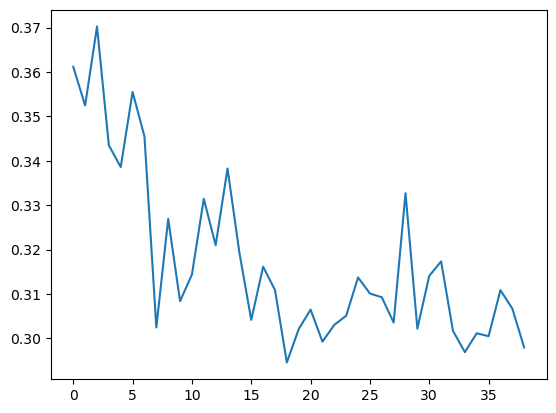

In [227]:
sns.lineplot(
    data=y,  err_style="bars"
)

In [228]:
m = y.index(max(y))
print(m+1)
b = m+1

3


In [229]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=b)

In [230]:
pprint(lda_model.print_topics(num_topics=b, num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.011*"model" + 0.008*"network" + 0.007*"method" + 0.007*"problem" + '
  '0.006*"algorithm" + 0.006*"data" + 0.006*"result" + 0.004*"paper" + '
  '0.004*"based" + 0.004*"proposed"'),
 (1,
  '0.010*"model" + 0.007*"data" + 0.006*"method" + 0.005*"result" + '
  '0.005*"learning" + 0.004*"paper" + 0.004*"study" + 0.004*"network" + '
  '0.004*"present" + 0.004*"algorithm"'),
 (2,
  '0.007*"data" + 0.007*"result" + 0.006*"paper" + 0.006*"model" + '
  '0.006*"method" + 0.006*"function" + 0.006*"algorithm" + 0.005*"field" + '
  '0.004*"study" + 0.004*"approach"')]


In [231]:
x = lda_model.print_topics(num_topics=b, num_words=10)
x

[(0,
  '0.011*"model" + 0.008*"network" + 0.007*"method" + 0.007*"problem" + 0.006*"algorithm" + 0.006*"data" + 0.006*"result" + 0.004*"paper" + 0.004*"based" + 0.004*"proposed"'),
 (1,
  '0.010*"model" + 0.007*"data" + 0.006*"method" + 0.005*"result" + 0.005*"learning" + 0.004*"paper" + 0.004*"study" + 0.004*"network" + 0.004*"present" + 0.004*"algorithm"'),
 (2,
  '0.007*"data" + 0.007*"result" + 0.006*"paper" + 0.006*"model" + 0.006*"method" + 0.006*"function" + 0.006*"algorithm" + 0.005*"field" + 0.004*"study" + 0.004*"approach"')]

In [232]:
len(x)

3

In [233]:
a = []
for i in x:
    b = i[1].split('"')
    c = []
    for j in range(0, len(b)):
        if(j%2!=0):
            c.append(b[j])
    a.append(c)

In [234]:
a

[['model',
  'network',
  'method',
  'problem',
  'algorithm',
  'data',
  'result',
  'paper',
  'based',
  'proposed'],
 ['model',
  'data',
  'method',
  'result',
  'learning',
  'paper',
  'study',
  'network',
  'present',
  'algorithm'],
 ['data',
  'result',
  'paper',
  'model',
  'method',
  'function',
  'algorithm',
  'field',
  'study',
  'approach']]

In [235]:
df = pd.DataFrame(a, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [236]:
df

,0,1,2,3,4,5,6,7,8,9
0,model,network,method,problem,algorithm,data,result,paper,based,proposed
1,model,data,method,result,learning,paper,study,network,present,algorithm
2,data,result,paper,model,method,function,algorithm,field,study,approach
